In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Proje:** **Çalışan Verimliliği Takip ve Analiz Sistemi**


---


In [2]:
# Çalışan sınıfı
class Calisan:
  calisan_sayisi = 0

  def __init__(self, isim, calisan_no, departman):
    self.isim = isim
    self.calisan_no = calisan_no
    self.departman = departman
    self.proje_bilgileri = {}
    Calisan.calisan_sayisi += 1

  def proje_ekle(self, proje_adı, proje_süresi):
    if proje_adı.proje_adı in self.proje_bilgileri:
      self.proje_bilgileri[proje_adı.proje_adı] += proje_süresi
    else:
      self.proje_bilgileri[proje_adı.proje_adı] = proje_süresi

    proje_adı.saat_ekle(proje_süresi)

# Proje sınıfı
class Proje:
  def __init__(self, proje_adı, proje_saati):
    self.proje_adı = proje_adı
    self.proje_saati = proje_saati
    self.toplam_saat = 0
    self.tamamlanma_durumu = "Tamamlanmadı"

  def saat_ekle(self, saat):
    self.toplam_saat += saat
    self.tamamlanma_durumu_guncelle()

  def tamamlanma_durumu_guncelle(self):
    if self.toplam_saat >= self.proje_saati:
      self.tamamlanma_durumu = "Tamamlandı"
    else:
      self.tamamlanma_durumu = "Tamamlanmadı"


# Çalışanlar
calisan1 = Calisan("büşra", 1, "yazilim")
calisan2 = Calisan("ahmet", 2, "teknik")
calisan3 = Calisan("mehmet", 3, "teknik")
calisan4 = Calisan("ali", 4, "tasarım")
calisan5 = Calisan("veli", 5, "tasarım")
calisan6 = Calisan("hasan", 6, "tasarım")

# Projeler
projeA = Proje("Proje A", 100)
projeB = Proje("Proje B", 80)
projeC = Proje("Proje C", 50)

# Çalışanların projelere saat eklemesi
calisan1.proje_ekle(projeA, 40)
calisan2.proje_ekle(projeB, 10)
calisan3.proje_ekle(projeB, 25)
calisan4.proje_ekle(projeC, 35)
calisan5.proje_ekle(projeC, 10)
calisan6.proje_ekle(projeA, 60)

In [3]:
print("Toplam Çalışan Sayısı:", Calisan.calisan_sayisi)

Toplam Çalışan Sayısı: 6


In [4]:
calisanlar = [calisan1, calisan2, calisan3, calisan4, calisan5, calisan6]
print("Tasarım departmanındaki çalışanlar:")
for calisan in calisanlar:
  if calisan.departman == "tasarım":
    print(calisan.isim)

Tasarım departmanındaki çalışanlar:
ali
veli
hasan


In [5]:
import pandas as pd

calisanlar = [calisan1, calisan2, calisan3, calisan4, calisan5, calisan6]
veri = []

for calisan in calisanlar:
  for proje_adı, proje_saati in calisan.proje_bilgileri.items():
    veri.append([calisan.isim, proje_adı, proje_saati])

df = pd.DataFrame(veri, columns=["Çalışan Adı", "Proje Adı", "Proje Saati"])
print(df)

  Çalışan Adı Proje Adı  Proje Saati
0       büşra   Proje A           40
1       ahmet   Proje B           10
2      mehmet   Proje B           25
3         ali   Proje C           35
4        veli   Proje C           10
5       hasan   Proje A           60


In [6]:
projeler = [projeA, projeB, projeC]
print("Projelerin Tamamlanma Durumları:")
for proje in projeler:
  print(f"{proje.proje_adı}: {proje.tamamlanma_durumu}")

Projelerin Tamamlanma Durumları:
Proje A: Tamamlandı
Proje B: Tamamlanmadı
Proje C: Tamamlanmadı


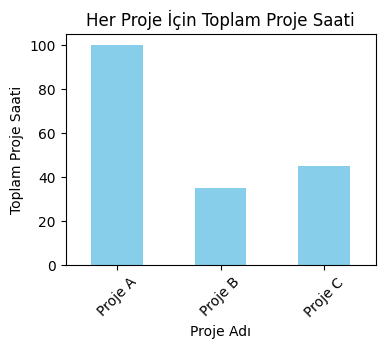

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

proje_saatleri = df.groupby("Proje Adı")["Proje Saati"].sum()

plt.figure(figsize=(4,3))
proje_saatleri.plot(kind="bar", color="skyblue")

plt.xlabel("Proje Adı")
plt.ylabel("Toplam Proje Saati")
plt.title("Her Proje İçin Toplam Proje Saati")
plt.xticks(rotation=45)

plt.show()

In [8]:
calisan1.proje_ekle(projeB, 10)
calisan2.proje_ekle(projeC, 5)

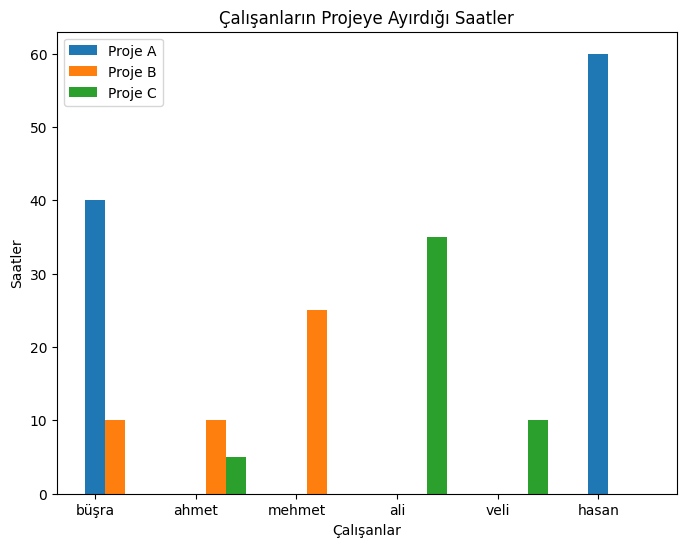

In [9]:
#çalışanların projeye ayırdığı saatler

calisan_isimleri = [calisan.isim for calisan in calisanlar]
proje_isimleri = [proje.proje_adı for proje in projeler]

# Çalışanların projeye ayırdığı saatler
for calisan in calisanlar:
    for proje in projeler:
        saat = calisan.proje_bilgileri.get(proje.proje_adı, 0)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
index = range(len(calisan_isimleri))

for i, proje in enumerate(projeler):
  ax.bar([x + i * bar_width for x in index], [calisan.proje_bilgileri.get(proje.proje_adı, 0) for calisan in calisanlar], width=bar_width, label=proje.proje_adı)

ax.set_xlabel("Çalışanlar")
ax.set_ylabel("Saatler")
ax.set_title("Çalışanların Projeye Ayırdığı Saatler")


ax.set_xticks(index, calisan_isimleri)
ax.set_xticklabels(calisan_isimleri)

ax.legend()

plt.show()

In [10]:
projeler = [projeA, projeB, projeC]
print("Projelerin Tamamlanma Durumları:")
for proje in projeler:
  print(f"{proje.proje_adı}: {proje.tamamlanma_durumu}")

Projelerin Tamamlanma Durumları:
Proje A: Tamamlandı
Proje B: Tamamlanmadı
Proje C: Tamamlandı


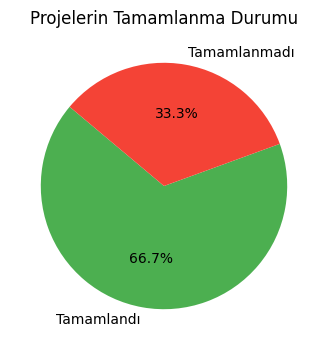

In [11]:

proje_durumları = [projeA.tamamlanma_durumu, projeB.tamamlanma_durumu, projeC.tamamlanma_durumu]

tamamlandi_sayisi = proje_durumları.count('Tamamlandı')
tamamlanmadi_sayisi = proje_durumları.count('Tamamlanmadı')


plt.figure(figsize=(4, 4))
plt.pie(
    [tamamlandi_sayisi, tamamlanmadi_sayisi],
    labels=['Tamamlandı', 'Tamamlanmadı'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4CAF50', '#F44336']
)
plt.title('Projelerin Tamamlanma Durumu')
plt.show()
